# Lab 1, Группа № 2371, Смирнов Максим Алексеевич
### Исследование набора данных Bitcoin Price

В рамках данной работы проводится исследование набора данных, включающее предобработку данных, статистический анализ и визуализацию. Для анализа был выбран датасет с информацией о ценах Bitcoin, который взят с платформы Kaggle.

## 1. Выбор исследуемого датасета

**Источник данных:** [Kaggle](https://www.kaggle.com/datasets/rahmasleam/bitcoin-price/data)

**Предметная область:** Финансы, криптовалюты.

**Характер данных:** Реальные данные о ценах на Bitcoin с сентября 2014 года по декабрь 2021 года.

**Атрибуты датасета:**
- `Date` (строковый) — Дата и время.
- `Open` (числовой) — Цена открытия.
- `High` (числовой) — Максимальная цена за день.
- `Low` (числовой) — Минимальная цена за день.
- `Close` (числовой) — Цена закрытия.
- `Adj Close` (числовой) — Скорректированная цена закрытия.
- `Volume` (числовой) — Объем торгов за день.

## 2. Импорт и предварительный анализ данных

In [ ]:
# Импорт библиотек и загрузка данных
import pandas as pd

# Чтение данных
df = pd.read_csv('bitcoin.csv')

# Вывод первых строк для анализа структуры данных
df.head()

## 3. Основные статистические характеристики

Теперь определим основные статистические параметры для каждого числового атрибута: среднее значение и стандартное отклонение.

In [ ]:
# Исключаем нечисловые столбцы, такие как 'Date'
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Настройка вывода для удобного отображения чисел
pd.options.display.float_format = '{:.2f}'.format

# Статистические характеристики для числовых данных
mean_values = numeric_df.mean()
std_dev = numeric_df.std()

mean_values, std_dev

Средние значения и стандартные отклонения для каждого атрибута отображены выше. Эти данные помогут нам понять общие тренды и разбросы ценовых данных Bitcoin.

## 4. Проверка на пропущенные значения

In [58]:
# Проверка на пропущенные значения
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Как видно, количество пропущенных значений для каждого атрибута минимально, что позволяет нам без значительной обработки использовать данные для дальнейшего анализа.

## 5. Обработка пропущенных значений

Если бы в данных присутствовали пропуски, мы могли бы заполнить их медианой соответствующих атрибутов:

In [63]:
# Заполнение пропущенных значений медианой для числовых столбцов
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Проверим, остались ли пропущенные значения
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## 6. Визуализация распределений атрибутов

Для лучшего понимания распределения данных построим гистограммы для всех числовых атрибутов.

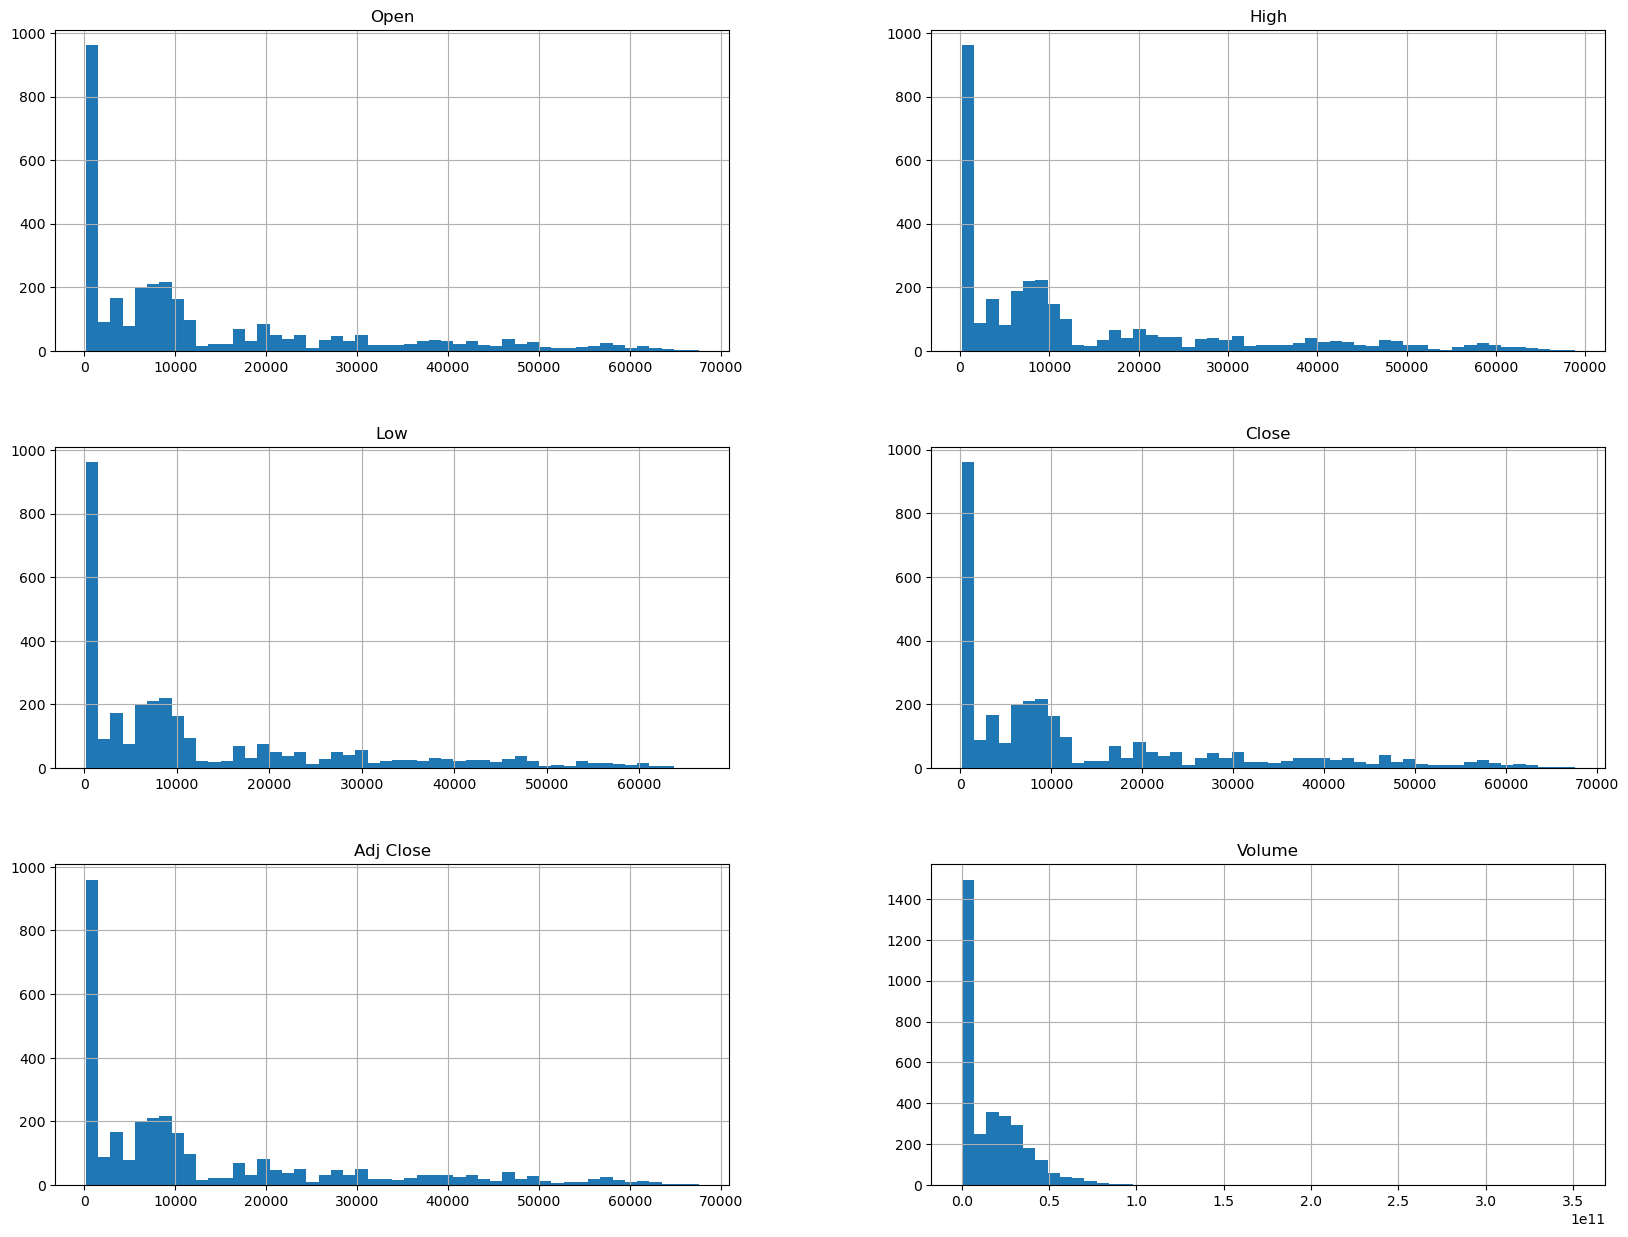

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Построение гистограмм
df.hist(bins=50, figsize=(20,15))
plt.show()

## 7. Корреляционный анализ

Определим корреляцию между параметрами, чтобы понять, какие атрибуты имеют сильную взаимосвязь.

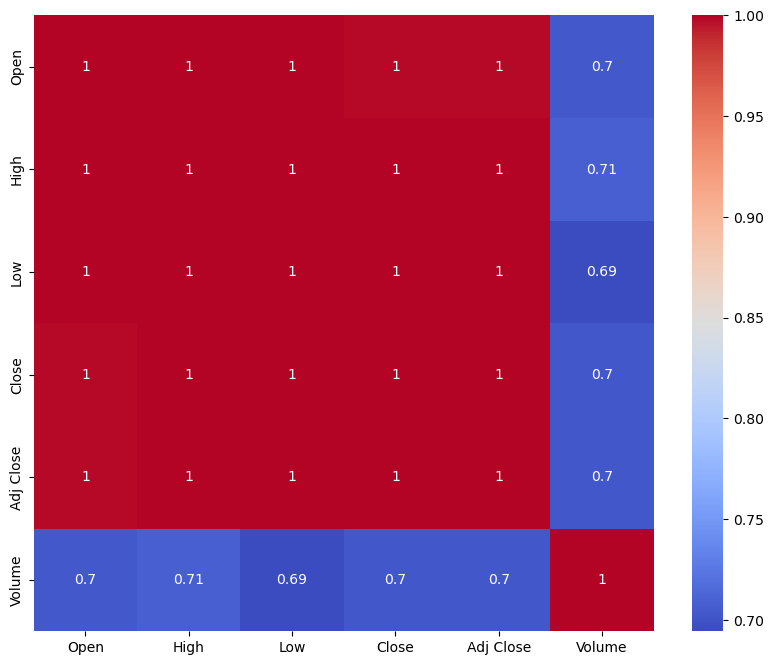

In [71]:
# Вычисление корреляционной матрицы только для числовых данных
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Построение тепловой карты корреляции
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

На тепловой карте показана корреляция между различными атрибутами датасета. Высокая корреляция наблюдается между `Open`, `Close`, `High`, и `Low`, что логично для финансовых данных, где эти параметры сильно связаны.

## 8. Графики рассеивания

Для более детального анализа взаимосвязей построим матрицу графиков рассеивания для выбранных атрибутов.

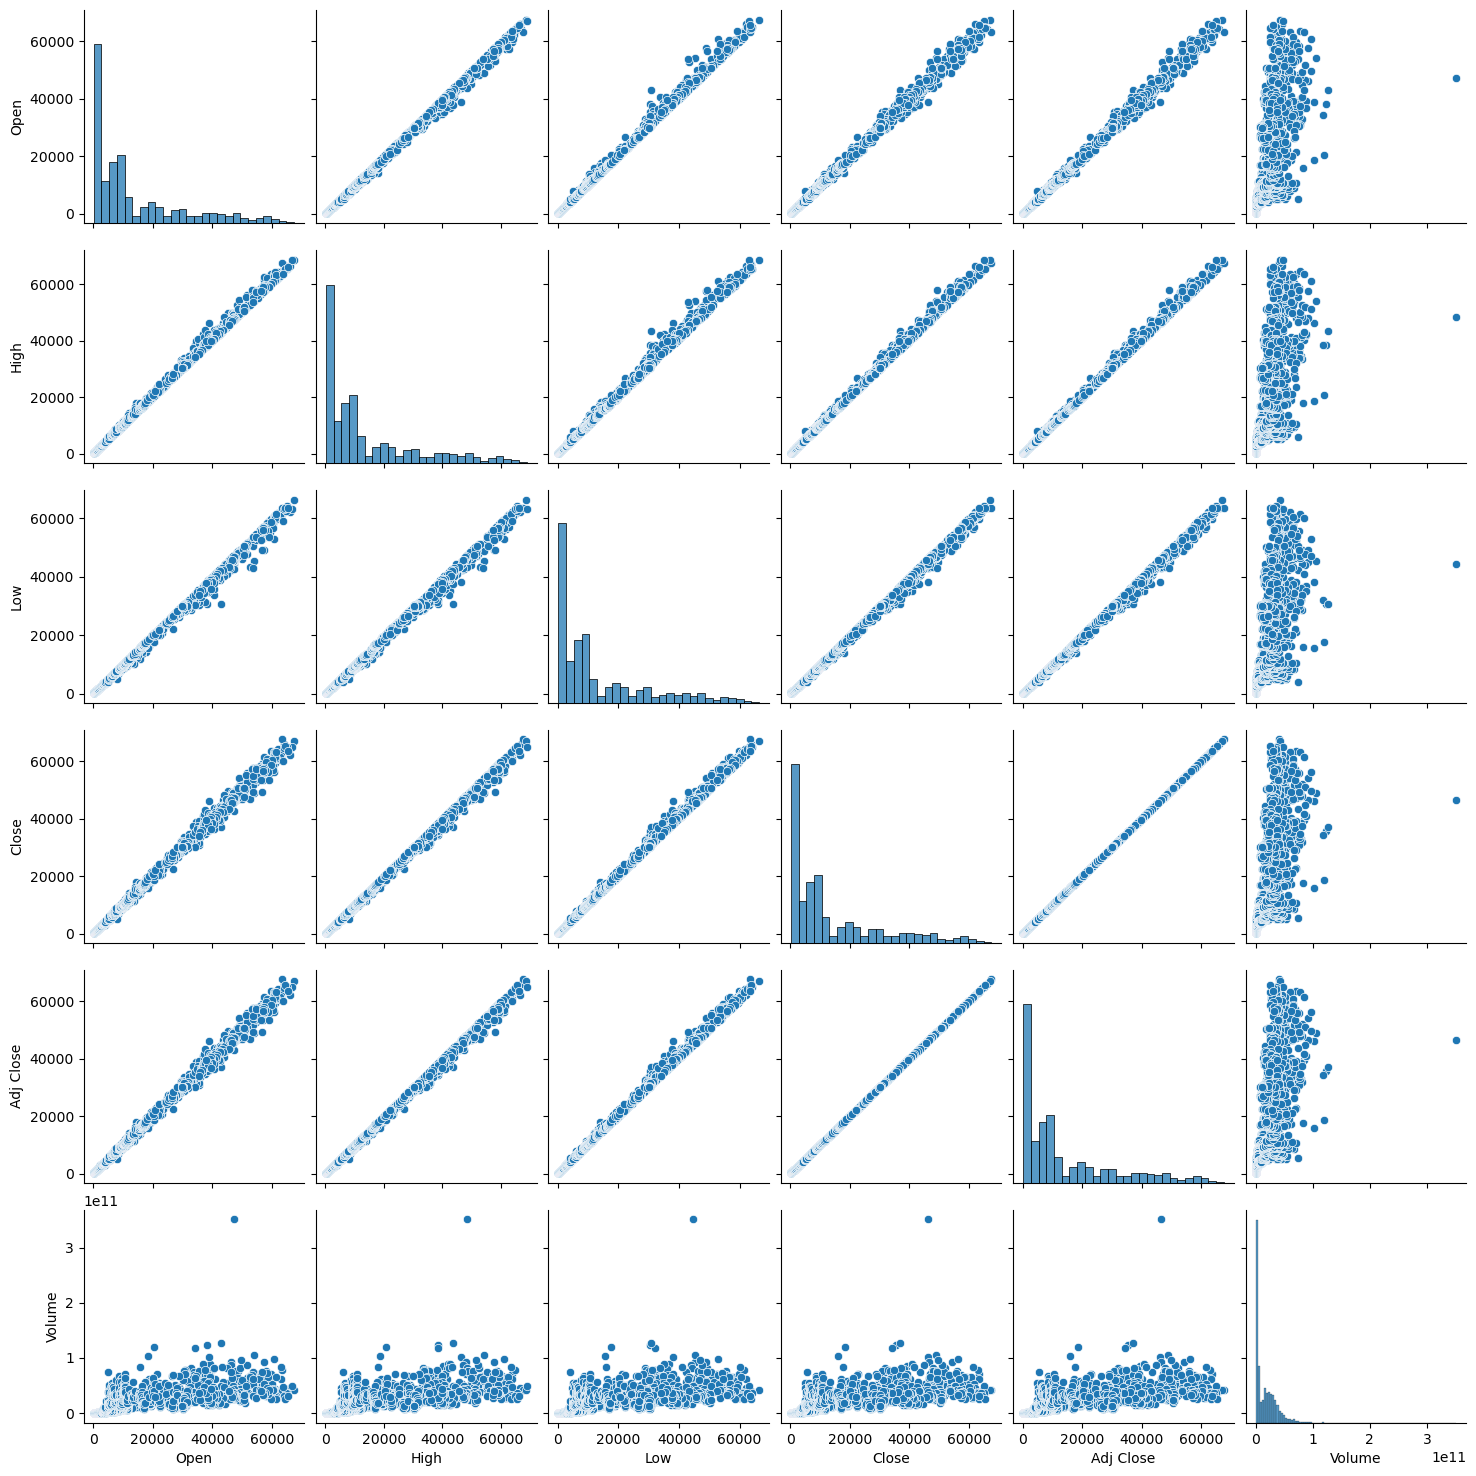

In [74]:
# Матрица графиков рассеивания
sns.pairplot(df)
plt.show()

Матрица графиков рассеивания позволяет визуально оценить зависимости между атрибутами и выявить возможные линейные зависимости.

## 9. Заключение

В рамках данного исследования мы проанализировали набор данных о ценах на Bitcoin, провели предобработку данных, выполнили расчет основных статистических параметров, проверили наличие пропусков и изучили корреляции между атрибутами. Мы обнаружили, что такие параметры как `Open`, `Close`, `High` и `Low` имеют высокую корреляцию, что ожидаемо для финансовых данных. Данный анализ подготовил основу для дальнейшего использования этих данных в задачах классификации и кластеризации.